<a href="https://colab.research.google.com/github/Dexne/Pattern_Recognition/blob/main/07_regresion_logistica_softmax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Reconocimiento de patrones**

Regresión logística y SoftMax

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Esta es la función logística

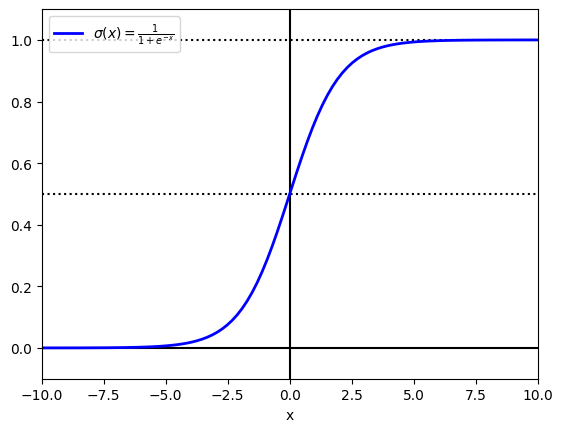

In [2]:
x = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-x))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(x, sig, "b-", linewidth=2, label=r"$\sigma(x) = \frac{1}{1 + e^{-x}}$")
plt.xlabel("x")
plt.legend(loc="upper left", fontsize=10)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

**Importar datos**

In [3]:
# Importar paquetes
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [4]:
# Leer datos
data = pd.read_csv('/content/diabetes.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


Exploración de datos

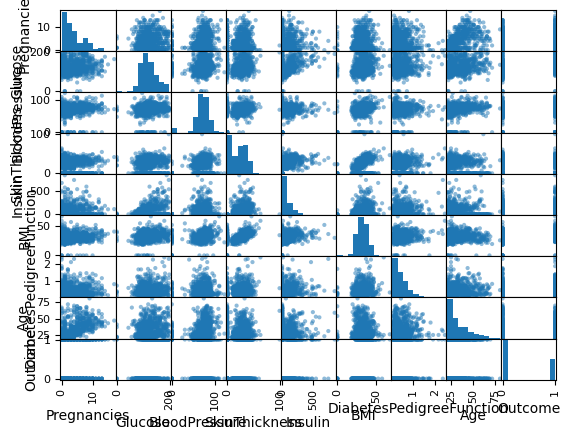

In [6]:
no_show = pd.plotting.scatter_matrix(data)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

<Axes: >

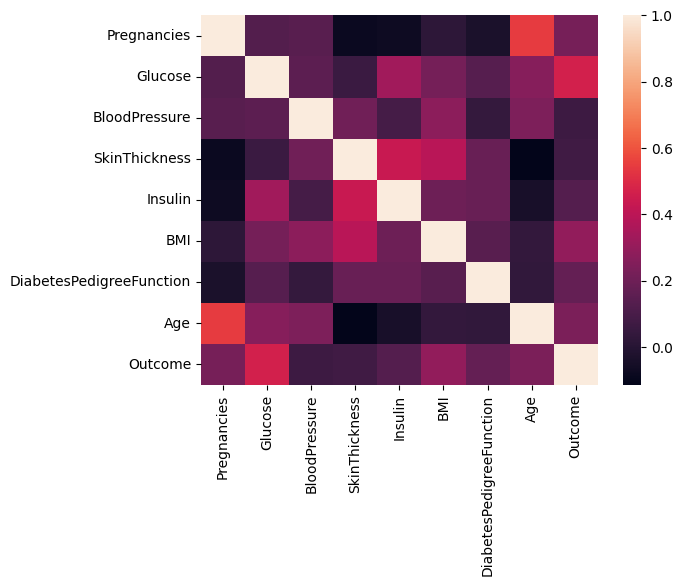

In [7]:
corr = data.corr()
print(corr)
import seaborn as sns
sns.heatmap(corr,
         xticklabels=corr.columns,
         yticklabels=corr.columns)

**Regresión logística**

Train:  0.75
Test:  0.734375


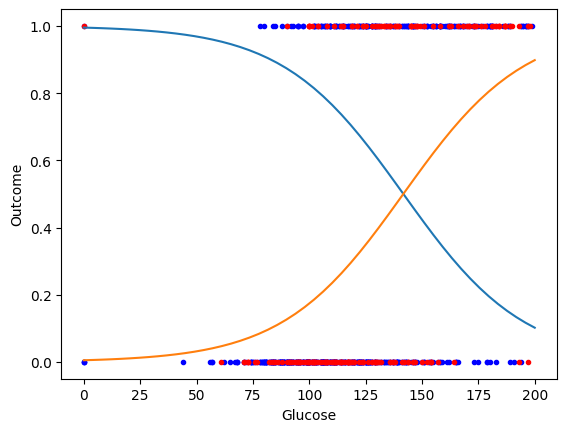

In [8]:
## Primer método

# Eleguir variables
x = np.asanyarray(data[['Glucose']])
y = np.asanyarray(data[['Outcome']]).ravel()

# Dividir Train/Test
xtrain, xtest, ytrain, ytest = train_test_split(x,y)

# Crear modelo y entrenar
logit=LogisticRegression(solver='lbfgs')
logit.fit(xtrain,ytrain)

# Calcular Score
print('Train: ', logit.score(xtrain,ytrain))
print('Test: ', logit.score(xtest,ytest))

g = np.linspace(0,200,50).reshape(-1,1)
prediction = logit.predict_proba(g)
plt.plot(xtrain,ytrain,'.b')
plt.plot(xtest,ytest,'.r')
plt.xlabel('Glucose')
plt.ylabel('Outcome')
plt.plot(g, prediction)

In [9]:
## Segundo método

# Eleguir variables
x = np.asanyarray(data.drop(columns=['Outcome']))
y = np.asanyarray(data[['Outcome']]).ravel()

# Dividir Train/Test
xtrain, xtest, ytrain, ytest = train_test_split(x,y)

# Importar nuevos paquetes
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Crear modelo y entrenar
model = Pipeline([
    ('scaler', StandardScaler()),
    ('logit', LogisticRegression(solver='lbfgs')) ])

# Crear modelo y entrenar
model.fit(xtrain,ytrain)

# Calcular Score
print('Train: ', model.score(xtrain,ytrain))
print('Test: ', model.score(xtest,ytest))

Train:  0.7621527777777778
Test:  0.8020833333333334


Explicación de variables

                          importance
Features                            
SkinThickness               0.019416
Insulin                     0.059727
DiabetesPedigreeFunction    0.075848
Age                         0.080569
BloodPressure               0.087116
Pregnancies                 0.111066
BMI                         0.246267
Glucose                     0.319991


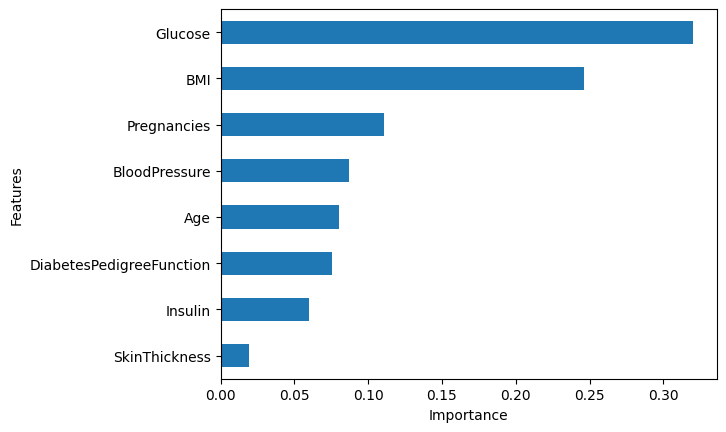

In [10]:
coeff = np.abs(model.named_steps['logit'].coef_[0])
coeff = coeff / np.sum(coeff)
labels = list(data.drop(columns=['Outcome']).columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh')
plt.xlabel('Importance')
print(features)

**Regresión polinomial logística**

In [11]:
## Tercer método

# Eleguir variables
x = np.asanyarray(data.drop(columns=['Outcome']))
y = np.asanyarray(data[['Outcome']]).ravel()

# Dividir Train/Test
xtrain, xtest, ytrain, ytest = train_test_split(x,y)

# Importar nuevos paquetes
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Crear modelo y entrenar
model = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('logit', LogisticRegression(solver='lbfgs'))
                ])


model.fit(xtrain,ytrain)

# Calcular Score
print('Train: ', model.score(xtrain,ytrain))
print('Test: ', model.score(xtest,ytest))

Train:  0.8159722222222222
Test:  0.7239583333333334


Regresión SoftMax

In [12]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [13]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Train:  0.9910714285714286
Test:  0.8421052631578947


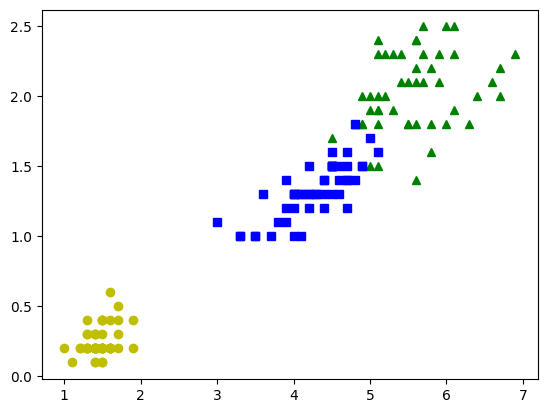

In [14]:
x = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

plt.plot(x[y==2, 0], x[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(x[y==1, 0], x[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(x[y==0, 0], x[y==0, 1], "yo", label="Iris-Setosa")

# Dividir Train/Test
xtrain, xtest, ytrain, ytest = train_test_split(x,y)

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs")
softmax_reg.fit(xtrain, ytrain)

# Calcular Score
print('Train: ', softmax_reg.score(xtrain,ytrain))
print('Test: ', softmax_reg.score(xtest,ytest))

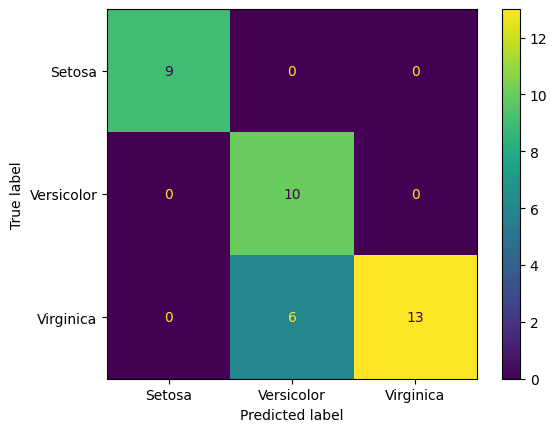

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

ypred = softmax_reg.predict(xtest)
cm = confusion_matrix(ytest, ypred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=['Setosa',
                                                        'Versicolor',
                                                        'Virginica']).plot()

In [17]:
from sklearn.metrics import classification_report
print('Classification Report: \n', classification_report(ytest, ypred))

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.62      1.00      0.77        10
           2       1.00      0.68      0.81        19

    accuracy                           0.84        38
   macro avg       0.88      0.89      0.86        38
weighted avg       0.90      0.84      0.85        38

